In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

# Fruit Classification

In [2]:
fruits = pd.read_csv('./data/fruit_data_with_colors.csv',index_col = 0)
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [10]:
col_category = fruits.select_dtypes(include=['O']).columns.values.tolist()
col_category


['fruit_name', 'fruit_subtype']

# Data Clean and Visualization

In [15]:
#fill na for numerical veriables, with median()
features= ['height', 'width', 'mass', 'color_score']
target = 'fruit_label'
fruits_clean = fruits[features + [target]]
cat_features = fruits_clean[features].select_dtypes(include=['O']).columns.values.tolist()
num_features = list(set(features)-set(cat_features))

fruits_clean[num_features] = fruits_clean[num_features].fillna(fruits_clean[num_features].median())

#categorical to dummy variables
column_dummies = [pd.get_dummies(fruits_clean[col], prefix=col, prefix_sep='_', dummy_na=True).iloc[:,1:] for col in cat_features]

try:
    all_dummies = pd.concat(column_dummies, axis=1)
    fruits_clean = pd.concat([fruits_clean[features+[target]],all_dummies], axis = 1)
except:
    fruits_clean = fruits_clean[features+[target]]
fruits_clean.head()

C:\Users\yuchen peng\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\frame.py:2440: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


,height,width,mass,color_score,fruit_label
0,7.3,8.4,192,0.55,1
1,6.8,8.0,180,0.59,1
2,7.2,7.4,176,0.60,1
3,4.7,6.2,86,0.80,2
4,4.6,6.0,84,0.79,2


In [16]:
X = fruits_clean[features]
y = fruits_clean[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

<IPython.core.display.Javascript object>


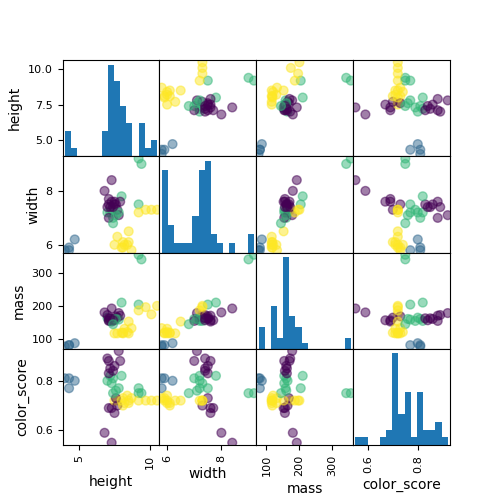

In [17]:
# This is a classification problem; draw a scatter matrix
scatter = pd.scatter_matrix(X_train, c= y_train, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(5,5))

# Use KNN to train a classifier

In [18]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)

In [19]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [20]:
knn.score(X_test, y_test)

0.53333333333333333

# Grid Search for "best" number of clusters

<IPython.core.display.Javascript object>


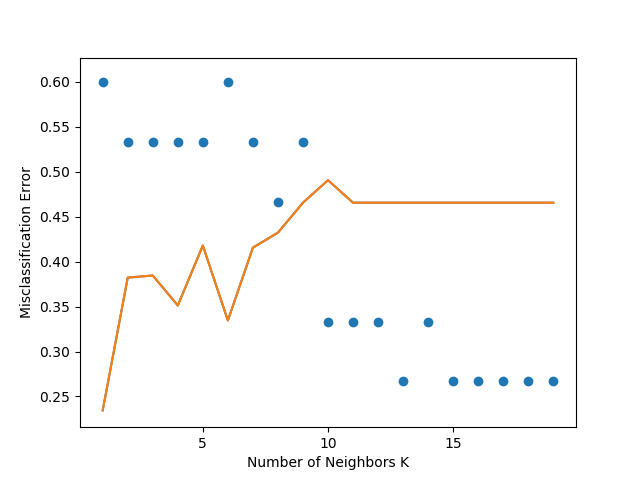

In [21]:
k_range = range(1,20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20]);

# 10-fold cross validation

In [29]:
from sklearn.model_selection import cross_val_score

cv_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())


MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = k_range[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

C:\Users\yuchen peng\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:581: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\yuchen peng\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:581: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\yuchen peng\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:581: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\yuchen peng\AppData\Local\Continuum\Anaconda3\lib\site-packages\

The optimal number of neighbors is 1


C:\Users\yuchen peng\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:581: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\yuchen peng\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:581: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\yuchen peng\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:581: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\yuchen peng\AppData\Local\Continuum\Anaconda3\lib\site-packages\

<IPython.core.display.Javascript object>


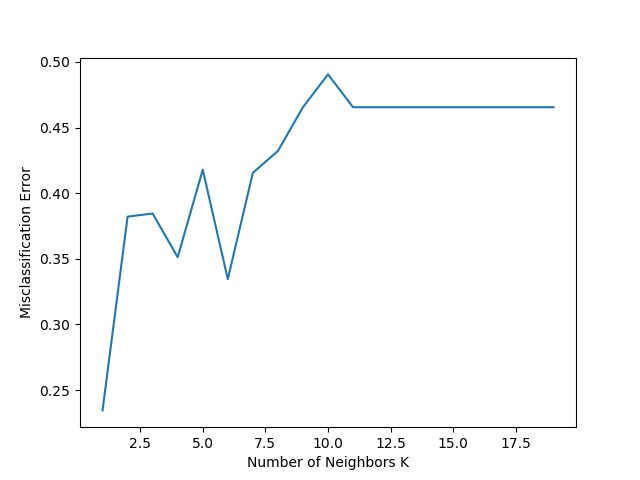

In [30]:
# plot misclassification error vs k
plt.figure()
plt.plot(k_range, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')